In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

nba_17_18 = pd.read_csv("NBA data per game avg/17-18 nba data.csv")
nba_16_17 = pd.read_csv("NBA data per game avg/16-17 nba data.csv")
nba_15_16 = pd.read_csv("NBA data per game avg/15-16 nba data.csv")
nba_14_15 = pd.read_csv("NBA data per game avg/14-15 nba data.csv")
nba_13_14 = pd.read_csv("NBA data per game avg/13-14 nba data.csv")

nba_17_18.head()

,Rk,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines,24,OKC,75,8,15.1,1.5,3.9,0.395,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy,27,BRK,70,8,19.4,1.9,5.2,0.356,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams,24,OKC,76,76,32.7,5.9,9.4,0.629,...,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo,20,MIA,69,19,19.8,2.5,4.9,0.512,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo,32,ORL,53,3,12.9,1.2,3.1,0.401,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [2]:
nba_stats_17_18 = nba_17_18.groupby(['Tm'])
nba_3s_17_18 = pd.DataFrame(nba_stats_17_18['3P', '3PA'].sum())
nba_3s_17_18['3P%'] = round((nba_3s_17_18['3P']/nba_3s_17_18['3PA'])*100, 1)


In [3]:
nba_stats_16_17 = nba_16_17.groupby(['Tm'])
nba_3s_16_17 = pd.DataFrame(nba_stats_16_17['3P', '3PA'].sum())
nba_3s_16_17['3P%'] = round((nba_3s_16_17['3P']/nba_3s_16_17['3PA'])*100, 1)


In [4]:
nba_stats_15_16 = nba_15_16.groupby(['Tm'])
nba_3s_15_16 = pd.DataFrame(nba_stats_15_16['3P', '3PA'].sum())
nba_3s_15_16['3P%'] = round((nba_3s_15_16['3P']/nba_3s_15_16['3PA'])*100, 1)


In [5]:
nba_stats_14_15 = nba_14_15.groupby(['Tm'])
nba_3s_14_15= pd.DataFrame(nba_stats_14_15['3P', '3PA'].sum())
nba_3s_14_15['3P%'] = round((nba_3s_14_15['3P']/nba_3s_14_15['3PA'])*100, 1)


In [6]:
nba_stats_13_14 = nba_13_14.groupby(['Tm'])
nba_3s_13_14 = pd.DataFrame(nba_stats_13_14['3P', '3PA'].sum())
nba_3s_13_14['3P%'] = round((nba_3s_13_14['3P']/nba_3s_13_14['3PA'])*100, 1)
nba_3s_13_14.head()

,3P,3PA,3P%
Tm,,,
ATL,12.3,35.6,34.6
BOS,11.7,34.8,33.6
BRK,11.8,32.8,36.0
CHI,10.1,29.3,34.5
CHO,9.9,29.7,33.3


In [7]:
threes_16_18 = pd.merge(nba_3s_16_17, nba_3s_17_18, how='outer', on='Tm')  


In [8]:
threes_16_18 = threes_16_18.rename(columns={'3P_x':'3P(16-17)', 
                                            '3PA_x':'3PA(16-17)', 
                                            '3P%_x':'3P%(16-17)',
                                            '3P_y':'3P(17-18)',
                                            '3PA_y':'3PA(17-18)',
                                            '3P%_y':'3P%(17-18)'})

In [9]:
threes_combined = pd.merge(nba_3s_15_16, threes_16_18, how='outer', on='Tm') 

In [10]:
threes_combined = threes_combined.rename(columns={'3P':'3P(15-16)', 
                                            '3PA':'3PA(15-16)', 
                                            '3P%':'3P%(15-16)'})

In [11]:
threes_combined = pd.merge(nba_3s_14_15, threes_combined, how='outer', on='Tm') 

In [12]:
threes_combined = threes_combined.rename(columns={'3P':'3P(14-15)', 
                                            '3PA':'3PA(14-15)', 
                                            '3P%':'3P%(14-15)'})


In [13]:
threes_combined_whole = pd.merge(nba_3s_13_14, threes_combined, how='outer', on='Tm')

In [14]:
threes_combined_whole = threes_combined_whole.rename(columns={'3P':'3P(13-14)', 
                                            '3PA':'3PA(13-14)', 
                                            '3P%':'3P%(13-14)'})
threes_combined_whole.head()

,3P(13-14),3PA(13-14),3P%(13-14),3P(14-15),3PA(14-15),3P%(14-15),3P(15-16),3PA(15-16),3P%(15-16),3P(16-17),3PA(16-17),3P%(16-17),3P(17-18),3PA(17-18),3P%(17-18)
Tm,,,,,,,,,,,,,,,
ATL,12.3,35.6,34.6,12.8,34.5,37.1,11.8,35.2,33.5,13.8,41.5,33.3,18.9,53.4,35.4
BOS,11.7,34.8,33.6,15.6,48.5,32.2,10.7,31.4,34.1,14.5,39.8,36.4,16.0,44.8,35.7
BRK,11.8,32.8,36.0,9.4,28.7,32.8,9.7,27.9,34.8,17.5,52.2,33.5,19.0,55.0,34.5
CHI,10.1,29.3,34.5,9.7,27.4,35.4,11.5,29.9,38.5,12.1,35.9,33.7,20.6,58.6,35.2
CHO,9.9,29.7,33.3,11.7,34.8,33.6,13.8,38.3,36.0,12.0,35.2,34.1,12.2,33.6,36.3


In [18]:
threes_combined_whole = threes_combined_whole.reset_index()
threes_combined_whole

,index,Tm,3P(13-14),3PA(13-14),3P%(13-14),3P(14-15),3PA(14-15),3P%(14-15),3P(15-16),3PA(15-16),3P%(15-16),3P(16-17),3PA(16-17),3P%(16-17),3P(17-18),3PA(17-18),3P%(17-18)
0,0,ATL,12.3,35.6,34.6,12.8,34.5,37.1,11.8,35.2,33.5,13.8,41.5,33.3,18.9,53.4,35.4
1,1,BOS,11.7,34.8,33.6,15.6,48.5,32.2,10.7,31.4,34.1,14.5,39.8,36.4,16.0,44.8,35.7
2,2,BRK,11.8,32.8,36.0,9.4,28.7,32.8,9.7,27.9,34.8,17.5,52.2,33.5,19.0,55.0,34.5
3,3,CHI,10.1,29.3,34.5,9.7,27.4,35.4,11.5,29.9,38.5,12.1,35.9,33.7,20.6,58.6,35.2
4,4,CHO,9.9,29.7,33.3,11.7,34.8,33.6,13.8,38.3,36.0,12.0,35.2,34.1,12.2,33.6,36.3
5,5,CLE,11.9,32.3,36.8,14.2,40.5,35.1,15.9,42.5,37.4,19.8,52.9,37.4,19.3,54.7,35.3
6,6,DAL,10.2,26.3,38.8,12.1,35.0,34.6,11.7,34.3,34.1,17.8,52.3,34.0,18.1,52.5,34.5
7,7,DEN,12.3,34.1,36.1,12.7,39.8,31.9,12.5,37.9,33.0,14.4,38.7,37.2,15.2,42.4,35.8
8,8,DET,8.1,26.3,30.8,14.5,44.9,32.3,14.6,41.1,35.5,9.7,29.8,32.6,17.4,49.6,35.1
9,9,GSW,11.8,32.4,36.4,11.7,29.3,39.9,14.3,34.7,41.2,13.6,36.4,37.4,14.8,39.1,37.9


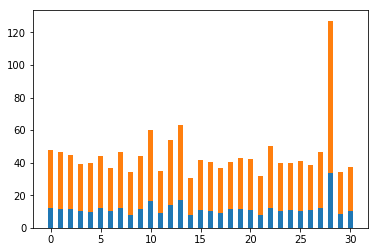

In [17]:
threepoint_made = (threes_combined_whole['3P(13-14)'])
#                   threes_combined_whole['3P(14-15)'],
#                   threes_combined_whole['3P(15-16)'],
#                   threes_combined_whole['3P(16-17)'],
#                   threes_combined_whole['3P(17-18)'])
threepoint_attempt = (threes_combined_whole['3PA(13-14)'])
#                   threes_combined_whole['3PA(14-15)'],
#                   threes_combined_whole['3PA(15-16)'],
#                   threes_combined_whole['3PA(16-17)'],
#                   threes_combined_whole['3PA(17-18)'])
yes = len(threes_combined_whole['Tm'])
width = 0.5
ind = np.arange(yes)

p1 = plt.bar(ind, threepoint_made, width )
p2 = plt.bar(ind, threepoint_attempt, width, bottom=threepoint_made )

plt.xticks=(ind, threes_combined_whole['Tm'])
